In [456]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import scipy
from scipy.optimize import curve_fit
from ast import literal_eval


import sys
#sys.path.append('/home/zelie/Python_projects/\
#water_scarcity_model/LowFlow/Code') 

from climada.hazard.low_flow import LowFlow

from climada.entity import ImpactFunc, ImpactFuncSet
from climada.entity.exposures import Exposures
from climada.engine import Impact


In [470]:
# function to buid impact function based on days instead of relativ flow.
# IF_data is a dataframe with containing some data points to build the function:
# these must at least be a bbox for the region, a yearly flow reduction from an event in %
# and the resulting yearly loss
# The other inputs are the same as to build a hazard.



def make_IF(IF_data, min_days_per_month, percentile, input_dir, gh_model, cl_model, \
                        fn_str_var= 'co2_dis_global_daily', scenario = 'historical',
                         soc = 'histsoc', yearrange=[1981,2005], yearrange_ref=[1981,2005],):
    
    
    
    ndays_list = []

    for index in [3]:  # loop through impact function data points
 
        bbox = literal_eval(IF_data['bbox'].iloc[index]) # area for which to calculate the hazards

        haz = LowFlow()

        haz.set_from_nc(percentile=percentile, input_dir=input_dir, yearrange=yearrange,yearrange_ref=yearrange_ref,bbox = bbox, gh_model=gh_model,\
                    cl_model=cl_model, scenario=scenario, soc=soc, keep_dis_data = True, min_days_per_month=min_days_per_month)
   
        
        discharge_reduction = float(IF_data[''.join(['discharge_reduction_',gh_model])].iloc[index]) # yearly discharge reduction
        loss = IF_data['loss'].iloc[index]
        
        # get the number of days that the event would have to last to get the equivalent yearly flow 
        # reduction 
        ndays = discharge_reduction/(1-haz.data['relative_dis'].mean())*365
        ndays_list.append(ndays)
        
    IF_data["_".join(['ndays',gh_model,cl_model])].iloc[3:4] = ndays_list
    return(IF_data)
        

In [471]:
input_dir = '/home/zelie/Python_projects/low_flow/data/isimip_data/'

fn_str_var= 'co2_dis_global_daily'
scenario = 'historical'
soc = 'histsoc'
yearrange=[1981,2005]
yearrange_ref=[1981,2005]
min_days_per_month=5
IF_data = pd.read_csv('IF_data2.csv')

for gh_model in ['h08']:#,'lpjml','matsiro']:
    for cl_model in ['hadgem2-es','gfdl-esm2m'#,'miroc5','ipsl-cm5a-lr']:
        IF_data = make_IF(IF_data, 5, 2.5, input_dir, gh_model, cl_model)

GETTING STARTED!
2020-06-25 14:39:11,160 - climada.hazard.low_flow - INFO - Computing threshold value per grid cell for Q2, 1981-2005
2020-06-25 14:39:29,151 - climada.hazard.centroids.centr - INFO - Setting geometry points.


In [513]:
IF_data = pd.read_csv('IF_data2.csv')

In [514]:
IF_data

Unnamed: 0    Focus          Region                  bbox  \
0           0    Hydro           Spain       [-9, 36, 0, 43]   
1           1    Hydro      California  [-121, 32, -113, 41]   
2           2  Nuclear            Elbe       [8, 49, 16, 57]   
3           3  Nuclear         Germany       [6, 47, 15, 54]   
4           4    Hydro  Central Europe       [6, 47, 25, 54]   
5           5  Nuclear  Central Europe       [6, 47, 25, 54]   

   discharge_reduction_lpjml  discharge_reduction_h08  \
0                      0.400                    0.400   
1                      0.380                    0.380   
2                      0.207                    0.207   
3                      0.440                    0.110   
4                      0.250                    0.200   
5                      0.250                    0.200   

   discharge_reduction_matsiro   loss  ndays_lpjml_gfdl-esm2m  \
0                        0.400  0.360              147.625905   
1                        0.380  0.500              163.623890   
2                        0.207  0.121               80.348232   
3                        0.440  0.115              169.812189   
4                        0.126  0.066               96.070088   
5                        0.126  0.047               96.070088   

   ndays_lpjml_hadgem2-es  ...  ndays_h08_hadgem2-es  ndays_h08_miroc5  \
0              147.153541  ...            159.124142        163.780676   
1              151.276405  ...            195.940772        189.757309   
2               79.268436  ...             98.831779         99.605056   
3              167.439366  ...            204.786512        205.390865   
4               95.494352  ...             93.593194         95.841213   
5               95.494352  ...             93.593194         95.841213   

   ndays_h08_ipsl-cm5a-lr  ndays_matsiro_gfdl-esm2m  ndays_matsiro_hadgem2-es  \
0              157.424331                184.410263                177.053534   
1              196.820995                156.690320                155.150555   
2              103.315537                147.732579                137.900041   
3              213.131782                374.807637                349.537848   
4              101.082347                 95.781287                 86.520399   
5              101.082347                 95.781287                 86.520399   

   ndays_matsiro_miroc5  ndays_matsiro_ipsl-cm5a-lr       lpjml         h08  \
0            184.392716                  174.695545  147.363721  160.491618   
1            154.344929                  156.649328  158.465328  193.213337   
2            146.357900                  173.733146   80.379709  100.567825   
3            363.360542                  427.864268  170.430173  206.982833   
4             94.987540                  104.482942   46.431381   57.931433   
5             94.987540                  104.482942   46.431381   57.931433   

      matsiro  
0  180.138015  
1  155.708783  
2  151.430917  
3  378.892574  
4   90.898135  
5   90.898135  

[6 rows x 23 columns]

In [ ]:
IF_data = IF_data[['Focus', 'Region', 'bbox', 'discharge reduction', 'loss',
       'ndays_lpjml_gfdl-esm2m',
       'ndays_lpjml_hadgem2-es', 'ndays_lpjml_miroc5',
       'ndays_lpjml_ipsl-cm5a-lr', 'ndays_h08_gfdl-esm2m','ndays_h08_hadgem2-es', 'ndays_h08_miroc5',
       'ndays_h08_ipsl-cm5a-lr', 'ndays_matsiro_gfdl-esm2m',
       'ndays_matsiro_hadgem2-es', 'ndays_matsiro_miroc5',
       'ndays_matsiro_ipsl-cm5a-lr']]


In [ ]:
IF_data['lpjml'] = IF_data.iloc[:,5:9].mean(axis=1)

IF_data['h08'] = IF_data.iloc[:,9:13].mean(axis=1)

IF_data['matsiro'] = IF_data.iloc[:,13:17].mean(axis=1)

In [346]:
hydro_if = IF_data[IF_data['Focus']=='Hydro']
thermo_if = IF_data[IF_data['Focus']!='Hydro']


lpjm and h08 hydro models combined with the 4 climate models, these look like we can make a common if, the points are quite close for all combinations

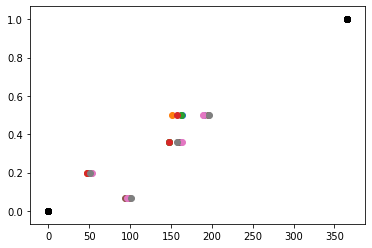

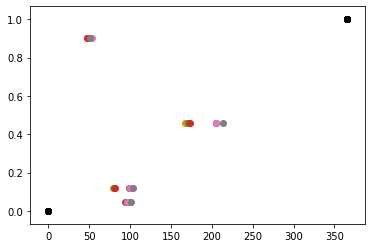

In [413]:

fig,ax = plt.subplots()
for gh_model in ['lpjml','h08']:
    for cl_model in ['gfdl-esm2m','hadgem2-es','miroc5','ipsl-cm5a-lr']:
        ax.scatter(hydro_if["_".join(['ndays',gh_model,cl_model])],hydro_if['loss'])
        ax.scatter([0,365],[0,1],color='black')                
        
fig,ax = plt.subplots()
for gh_model in ['lpjml','h08']:
    for cl_model in ['gfdl-esm2m','hadgem2-es','miroc5','ipsl-cm5a-lr']:
        ax.scatter(thermo_if["_".join(['ndays',gh_model,cl_model])],thermo_if['loss'])
        ax.scatter([0,365],[0,1],color='black')
        
 #the points in black would be assumptions       

below Matsiro hydro model, a bit of a mess... as seen above the relative discharge during events is much higher compared to the others.
I don't know if their is an error during the calculation or if it is really so.

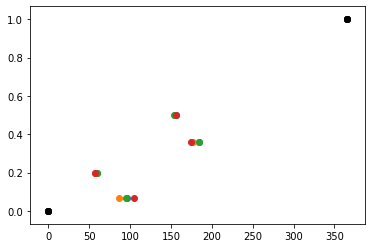

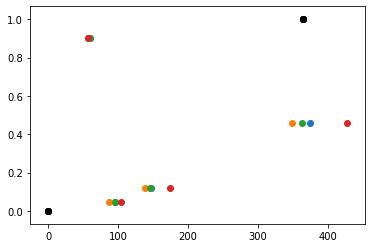

In [410]:
fig,ax = plt.subplots()
for gh_model in ['matsiro']:
    for cl_model in ['gfdl-esm2m','hadgem2-es','miroc5','ipsl-cm5a-lr']:
        ax.scatter(hydro_if["_".join(['ndays',gh_model,cl_model])],hydro_if['loss'])
        ax.scatter([0,365],[0,1],color='black')                
        
fig,ax = plt.subplots()
for gh_model in ['matsiro']:
    for cl_model in ['gfdl-esm2m','hadgem2-es','miroc5','ipsl-cm5a-lr']:
        ax.scatter(thermo_if["_".join(['ndays',gh_model,cl_model])],thermo_if['loss'])
        ax.scatter([0,365],[0,1],color='black')
        
#the points in black would be assumptions

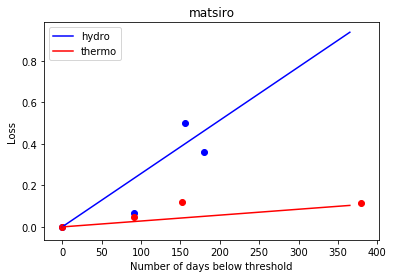

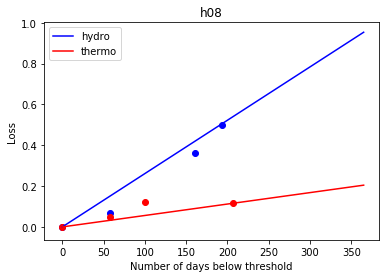

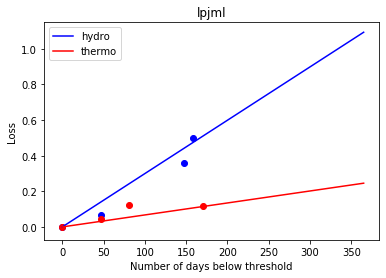

In [516]:
IF_data = pd.read_csv('IF_data.csv')
hydro = IF_data[IF_data['Focus']=='Hydro']
thermo = IF_data[IF_data['Focus']!='Hydro']


col = {'thermo':'Red', 'hydro':'blue'}

data = {'thermo':thermo,'hydro':hydro}
if_slopes = {}

for h_model in ['matsiro','h08','lpjml']:
    fig, ax = plt.subplots()
    if_slopes[h_model] = {}
    for technology in ['hydro','thermo']:
        n = [0]+list(data[technology][h_model])
        d = [0]+list(data[technology]['loss'])

        x0 = np.linspace(0,365*2,100)
        s = np.polyfit(n,d,1)[0]
        
        if_slopes[h_model][technology] = s
        ax.plot(x0,s*x0,color = col[technology],label=technology)
        ax.scatter(n,d,color = col[technology])
        ax.set_xlabel('Number of days below threshold')
        ax.set_ylabel('Loss')
        ax.legend()
        ax.set_title(" ".join([h_model]))
        

In [493]:

def init_IFS_linear(s):
    """define impact function imp_fun and return impact function set (IFS)"""
    x0 = np.linspace(0,365,100)
    imp_fun = ImpactFunc()
    imp_fun.haz_type = 'LF'
    imp_fun.id = 1
    imp_fun.name = 'Low flow business interruption'
    imp_fun.intensity_unit = 'days'
    imp_fun.intensity = x0
    imp_fun.mdd = s*x0
 # loss to annual operation
    imp_fun.paa = imp_fun.intensity * 0 + 1
    #imp_fun.paa[imp_fun.intensity<mdm] = 0
    imp_fun.check()
    IFS = ImpactFuncSet()
    IFS.append(imp_fun)
    return IFS


# New Attempt, using historical events

### to do: 
###            1. load hazards for the years& regions found in the literature research
###            2. calculate impacts until equivalent loss of production is found
###            3. compare to 'normal' years


In [3]:
wri_power_plants_path = '/home/zelie/Python_projects/low_flow/data/exposure/global_power_plant_database.csv'


def load_exposure(bbox=[-180, -90, 180, 90], exp_path=wri_power_plants_path, primary_fuel='Nuclear'):
    """load exposure data from CSV
    Here, we use WRI power plant data from
    https://www.wri.org/publication/global-power-plant-database"""
    exp_df = pd.read_csv(exp_path)
    if primary_fuel:
        exp_df = exp_df[exp_df.primary_fuel==primary_fuel]
    # europe:
    exp_df = exp_df[exp_df.longitude>bbox[0]]
    exp_df = exp_df[exp_df.longitude<bbox[2]]
    exp_df = exp_df[exp_df.latitude>bbox[1]]
    exp_df = exp_df[exp_df.latitude<bbox[3]]
    exp_df['gen_mean']=exp_df[["generation_gwh_2013", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017"]].mean(axis=1)
    exp_df['value']=exp_df[["gen_mean", "estimated_generation_gwh"]].mean(axis=1)
    # exp_df['value'] = exp_df.capacity_mw # provide value in MegaWatt
    
    #exp_df['latitude'] = 
    #exp_df['longitude'] = 
    exp_df['if_'] = 1
    exp_df['if_LF'] = 1
    # exp_df = exp_df.drop(columns=['country', 'name', 'gppd_idnr',
    #    'latitude', 'longitude', 'primary_fuel', 'owner', 'source', 'url',
    #    'geolocation_source', 'wepp_id', 'year_of_capacity_data',
    #    'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
    #    'generation_gwh_2016', 'generation_gwh_2017',
    #    'estimated_generation_gwh', 'value', 'value_unit', 'if_TC', 'geometry'])
    

    # Generate Exposures from exposure-DataFranme
    exp_df = Exposures(exp_df)
    exp_df.value_unit = 'GWh'
    exp_df.ref_year = 2005
    exp_df.set_geometry_points() # set geometry attribute (shapely Points) from GeoDataFrame from latitude and longitude
    print('\n' + '\x1b[1;03;30;30m' + 'check method logs:' + '\x1b[0m')
    exp_df.check() # puts metadata that has not been assigned
    return exp_df

In [86]:
hydro = load_exposure(primary_fuel='Hydro')

2020-06-25 10:56:59,285 - climada.util.coordinates - INFO - Setting geometry points.

check method logs:
2020-06-25 10:56:59,476 - climada.entity.exposures.base - INFO - crs set to default value: {'init': 'epsg:4326', 'no_defs': True}
2020-06-25 10:56:59,476 - climada.entity.exposures.base - INFO - tag metadata set to default value:  File: 
 Description: 
2020-06-25 10:56:59,477 - climada.entity.exposures.base - INFO - meta metadata set to default value: None
2020-06-25 10:56:59,477 - climada.entity.exposures.base - INFO - Hazard type not set in if_
2020-06-25 10:56:59,477 - climada.entity.exposures.base - INFO - centr_ not set.
2020-06-25 10:56:59,478 - climada.entity.exposures.base - INFO - deductible not set.
2020-06-25 10:56:59,478 - climada.entity.exposures.base - INFO - cover not set.
2020-06-25 10:56:59,478 - climada.entity.exposures.base - INFO - category_id not set.
2020-06-25 10:56:59,479 - climada.entity.exposures.base - INFO - region_id not set.


# Spain 2005 Drought

In Spain, the 2005 drought led to a reduction of 36% in national hydroelectric power
production (equivalent to 12 876 GWh), with respect to the past five year average. The
decrease in hydraulic and nuclear production has been compensated by an increase in fuel-gas
plant production and combined cycles that increased their production by respectively 28% and
66%, compared to 2004. This extra production led to an additional cost of 713 Mio €. It is
also worthwhile to mention that replacing hydro-electricity by fossil fuel gave rise to
environmental impacts. 
source: https://ec.europa.eu/environment/water/quantity/pdf/comm_droughts/2nd_int_report.pdf p.45

In [284]:

min_days_per_month = 5
percentile = 10
input_dir = '../data/isimip_data/'
gh_model = 'h08'
cl_model = 'gswp3'
fn_str_var= 'co2_dis_global_daily'
scenario = 'hist'
soc = 'pressoc'
yearrange=[2005,2006]
yearrange_ref=[1981,2005]
bbox = [-9,34,9,45]
spain_2005 = LowFlow()

spain_2005.set_from_nc(percentile=percentile, input_dir=input_dir, yearrange=yearrange,yearrange_ref=yearrange_ref,bbox = bbox, gh_model=gh_model,\
                    cl_model=cl_model, bias_correction = 'nobc',scenario=scenario, scenario_ref=scenario, soc=soc, soc_ref=soc, keep_dis_data = True, min_days_per_month=min_days_per_month,\
                        min_intensity=min_intensity, min_number_cells=min_number_cells)


GETTING STARTED!
2020-06-25 12:16:55,720 - climada.hazard.low_flow - INFO - Computing threshold value per grid cell for Q10, 1981-2005
2020-06-25 12:17:10,918 - climada.hazard.centroids.centr - INFO - Setting geometry points.
2020-06-25 12:17:13,701 - climada.hazard.low_flow - INFO - Filtering events: 2 events remaining


In [285]:
yearrange=[2000,2005]

spain_2000_2005 = LowFlow()
spain_2000_2005.set_from_nc(percentile=percentile, input_dir=input_dir, yearrange=yearrange,yearrange_ref=yearrange_ref,bbox = bbox, gh_model=gh_model,\
                    cl_model=cl_model, bias_correction = 'nobc',scenario=scenario, scenario_ref=scenario, soc=soc, soc_ref=soc, keep_dis_data = True, min_days_per_month=min_days_per_month,\
                        min_intensity=min_intensity, min_number_cells=min_number_cells)


GETTING STARTED!
2020-06-25 12:17:17,360 - climada.hazard.low_flow - INFO - Computing threshold value per grid cell for Q10, 1981-2005
2020-06-25 12:17:32,598 - climada.hazard.centroids.centr - INFO - Setting geometry points.
2020-06-25 12:17:39,899 - climada.hazard.low_flow - INFO - Filtering events: 4 events remaining


In [101]:
hydro_spain = hydro[hydro['country']=='ESP']
hydro_spain = Exposures(hydro_spain)
hydro_spain.check()

2020-06-25 11:00:17,488 - climada.entity.exposures.base - INFO - crs set to default value: {'init': 'epsg:4326', 'no_defs': True}
2020-06-25 11:00:17,489 - climada.entity.exposures.base - INFO - Hazard type not set in if_
2020-06-25 11:00:17,490 - climada.entity.exposures.base - INFO - centr_ not set.
2020-06-25 11:00:17,490 - climada.entity.exposures.base - INFO - deductible not set.
2020-06-25 11:00:17,490 - climada.entity.exposures.base - INFO - cover not set.
2020-06-25 11:00:17,491 - climada.entity.exposures.base - INFO - category_id not set.
2020-06-25 11:00:17,491 - climada.entity.exposures.base - INFO - region_id not set.


In [95]:
hydro_spain.value.sum()

42970.0

In [97]:
hydro_spain.value.sum()*0.36 ( a bit overestimated, might have changes since 2005)

15469.199999999999

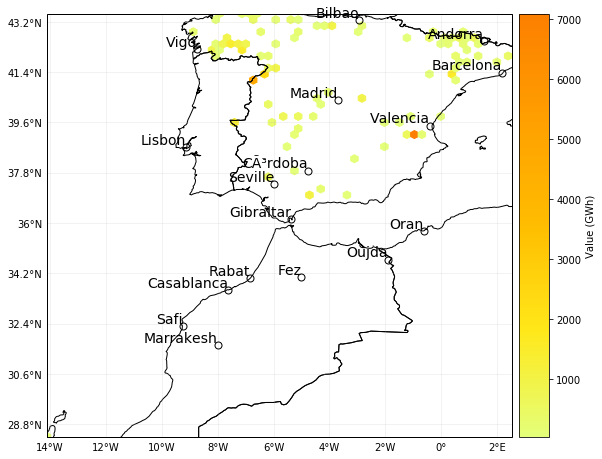

In [96]:
hydro_spain.plot_hexbin()

In [502]:
IFS_lf = init_IFS_linear(if_slopes['h08']['hydro'])

2020-06-25 15:04:21,861 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.


In [520]:
imp_spain_2005 = Impact()
imp_spain_2005.calc(hydro_spain, IFS_lf, spain_2005)
print(imp_spain_2005.at_event.sum()/(imp_spain_2005.tot_value)*100)


2020-06-25 15:26:00,091 - climada.engine.impact - INFO - Exposures matching centroids found in centr_LF
2020-06-25 15:26:00,093 - climada.engine.impact - INFO - Calculating damage for 477 assets (>0) and 2 events.
4.945262338333514


## Should be 36% is 5%

In [420]:
imp_spain_2000_2005 = Impact()
imp_spain_2000_2005.calc(hydro_spain, IFS_lf, spain_2000_2005)
print(imp_spain_2000_2005.at_event.sum()/(imp_spain_2000_2005.tot_value*5))


2020-06-25 13:59:40,130 - climada.engine.impact - INFO - Exposures matching centroids found in centr_LF
2020-06-25 13:59:40,135 - climada.engine.impact - INFO - Calculating damage for 477 assets (>0) and 4 events.
0.08041912261588215


In [199]:
nuclear = load_exposure(primary_fuel='Nuclear')
nuclear_germany = nuclear[nuclear['country_long']=='Germany']
nuclear_germany = Exposures(nuclear_germany)
nuclear_germany.check()

2020-06-25 11:37:24,940 - climada.util.coordinates - INFO - Setting geometry points.

check method logs:
2020-06-25 11:37:24,949 - climada.entity.exposures.base - INFO - crs set to default value: {'init': 'epsg:4326', 'no_defs': True}
2020-06-25 11:37:24,950 - climada.entity.exposures.base - INFO - tag metadata set to default value:  File: 
 Description: 
2020-06-25 11:37:24,950 - climada.entity.exposures.base - INFO - meta metadata set to default value: None
2020-06-25 11:37:24,950 - climada.entity.exposures.base - INFO - Hazard type not set in if_
2020-06-25 11:37:24,951 - climada.entity.exposures.base - INFO - centr_ not set.
2020-06-25 11:37:24,951 - climada.entity.exposures.base - INFO - deductible not set.
2020-06-25 11:37:24,952 - climada.entity.exposures.base - INFO - cover not set.
2020-06-25 11:37:24,952 - climada.entity.exposures.base - INFO - category_id not set.
2020-06-25 11:37:24,952 - climada.entity.exposures.base - INFO - region_id not set.
2020-06-25 11:37:24,955 - cl

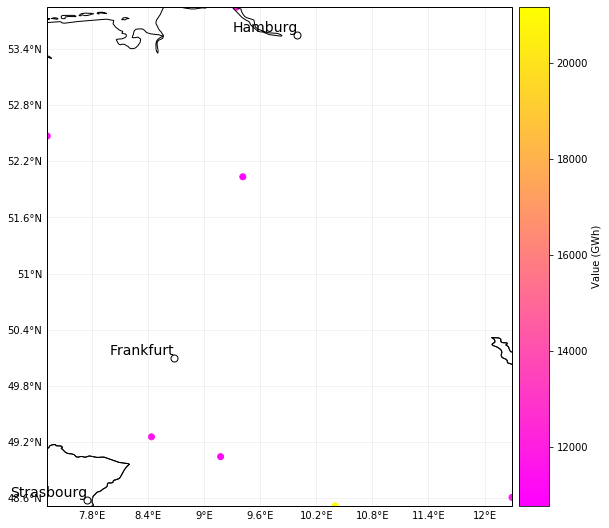

In [496]:
nuclear_germany.plot_scatter(cmap='spring')

In [495]:
min_days_per_month = 5
percentile = 2.5
input_dir = '../data/isimip_data/'
gh_model = 'h08'
cl_model = 'gswp3'
fn_str_var= 'co2_dis_global_daily'
scenario = 'hist'
soc = 'pressoc'
yearrange=[2003,2004]
yearrange_ref=[1981,2005]
bbox = [5,40,15,55]
germany_2003 = LowFlow()
min_intensity=5
min_number_cells=16

germany_2003.set_from_nc(percentile=percentile, input_dir=input_dir, yearrange=yearrange,yearrange_ref=yearrange_ref,bbox = bbox, gh_model=gh_model,\
                    cl_model=cl_model, bias_correction = 'nobc',scenario=scenario, scenario_ref=scenario, soc=soc, soc_ref=soc, keep_dis_data = True, min_days_per_month=min_days_per_month,\
                        min_intensity=min_intensity, min_number_cells=min_number_cells)


GETTING STARTED!
2020-06-25 14:57:20,748 - climada.hazard.low_flow - INFO - Computing threshold value per grid cell for Q2, 1981-2005
2020-06-25 14:57:37,229 - climada.hazard.centroids.centr - INFO - Setting geometry points.
2020-06-25 14:57:38,856 - climada.hazard.low_flow - INFO - Filtering events: 3 events remaining


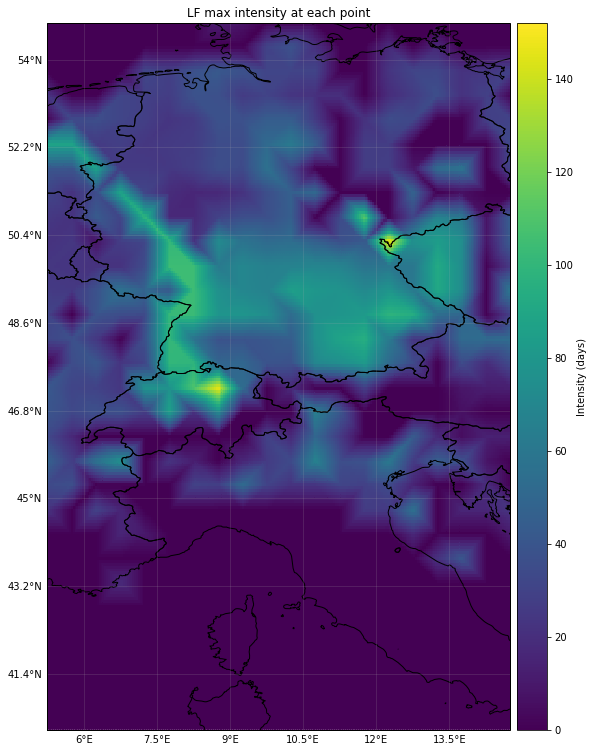

In [497]:
germany_2003.plot_intensity(0)

In [479]:
if_slopes['h08']['thermo'](x0)

array([0.20384742, 0.20833869, 0.21282996, 0.21732123, 0.2218125 ,
       0.22630377, 0.23079504, 0.2352863 , 0.23977757, 0.24426884,
       0.24876011, 0.25325138, 0.25774265, 0.26223392, 0.26672519,
       0.27121646, 0.27570773, 0.28019899, 0.28469026, 0.28918153,
       0.2936728 , 0.29816407, 0.30265534, 0.30714661, 0.31163788,
       0.31612915, 0.32062042, 0.32511168, 0.32960295, 0.33409422,
       0.33858549, 0.34307676, 0.34756803, 0.3520593 , 0.35655057,
       0.36104184, 0.36553311, 0.37002437, 0.37451564, 0.37900691,
       0.38349818, 0.38798945, 0.39248072, 0.39697199, 0.40146326,
       0.40595453, 0.4104458 , 0.41493706, 0.41942833, 0.4239196 ,
       0.42841087, 0.43290214, 0.43739341, 0.44188468, 0.44637595,
       0.45086722, 0.45535849, 0.45984975, 0.46434102, 0.46883229,
       0.47332356, 0.47781483, 0.4823061 , 0.48679737, 0.49128864,
       0.49577991, 0.50027118, 0.50476244, 0.50925371, 0.51374498,
       0.51823625, 0.52272752, 0.52721879, 0.53171006, 0.53620

In [519]:
IFS_lf = init_IFS_linear(if_slopes['h08']['thermo'])

imp_germany_2003 = Impact()
imp_germany_2003.calc(nuclear_germany, IFS_lf, germany_2003)
print(imp_germany_2003.at_event.sum()/imp_germany_2003.tot_value*100)


2020-06-25 15:25:34,328 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.
2020-06-25 15:25:34,331 - climada.engine.impact - INFO - Exposures matching centroids found in centr_LF
2020-06-25 15:25:34,334 - climada.engine.impact - INFO - Calculating damage for 7 assets (>0) and 3 events.
3.5711487713617007


## --> should be 11% is 3.5%

In [308]:
yearrange=[2000,2005]

germany_2000_2005 = LowFlow()
germany_2000_2005
germany_2000_2005.set_from_nc(percentile=percentile, input_dir=input_dir, yearrange=yearrange,yearrange_ref=yearrange_ref,bbox = bbox, gh_model=gh_model,\
                    cl_model=cl_model, bias_correction = 'nobc',scenario=scenario, scenario_ref=scenario, soc=soc, soc_ref=soc, keep_dis_data = True, min_days_per_month=min_days_per_month,\
                        min_intensity=min_intensity, min_number_cells=min_number_cells)


GETTING STARTED!
2020-06-25 12:28:59,742 - climada.hazard.low_flow - INFO - Computing threshold value per grid cell for Q10, 1981-2005
2020-06-25 12:29:15,291 - climada.hazard.centroids.centr - INFO - Setting geometry points.
2020-06-25 12:29:22,605 - climada.hazard.low_flow - INFO - Filtering events: 4 events remaining


In [311]:
imp_germany_2000_2005 = Impact()
imp_germany_2000_2005.calc(nuclear_germany, IFS_lf, germany_2000_2005)
print(imp_germany_2000_2005.at_event.sum()/(imp_germany_2000_2005.tot_value*5)*100)


2020-06-25 13:16:14,145 - climada.engine.impact - INFO - Exposures matching centroids found in centr_LF
2020-06-25 13:16:14,146 - climada.engine.impact - INFO - Calculating damage for 7 assets (>0) and 4 events.
2.798161753770574


# France 2003 & 2006

## Les pertes de production ont atteint 5,5 TWh en 2003 et 2,5 TWh en 2006
https://www.sfen.org/rgn/adapter-centrales-nucleaires-changement-climatique

In [333]:
min_days_per_month = 5
percentile = 2.5
input_dir = '../data/isimip_data/'
gh_model = 'h08'
cl_model = 'gswp3'
fn_str_var= 'co2_dis_global_daily'
scenario = 'hist'
soc = 'pressoc'
yearrange=[2003,2004]
yearrange_ref=[1981,2005]
bbox = [-5,40,10,55]
min_intensity=5
min_number_cells=16

france_2003 = LowFlow()

france_2003.set_from_nc(percentile=percentile, input_dir=input_dir, yearrange=yearrange,yearrange_ref=yearrange_ref,bbox = bbox, gh_model=gh_model,\
                    cl_model=cl_model, bias_correction = 'nobc',scenario=scenario, scenario_ref=scenario, soc=soc, soc_ref=soc, keep_dis_data = True, min_days_per_month=min_days_per_month,\
                        min_intensity=min_intensity, min_number_celshouldls=min_number_cells)

yearrange=[2006,2007]

france_2006 = LowFlow()

france_2006.set_from_nc(percentile=percentile, input_dir=input_dir, yearrange=yearrange,yearrange_ref=yearrange_ref,bbox = bbox, gh_model=gh_model,\
                    cl_model=cl_model, bias_correction = 'nobc',scenario=scenario, scenario_ref=scenario, soc=soc, soc_ref=soc, keep_dis_data = True, min_days_per_month=min_days_per_month,\
                        min_intensity=min_intensity, min_number_cells=min_number_cells)


GETTING STARTED!
2020-06-25 13:30:17,231 - climada.hazard.low_flow - INFO - Computing threshold value per grid cell for Q2, 1981-2005
2020-06-25 13:30:34,123 - climada.hazard.centroids.centr - INFO - Setting geometry points.
2020-06-25 13:30:36,187 - climada.hazard.low_flow - INFO - Filtering events: 3 events remaining
GETTING STARTED!
2020-06-25 13:30:37,600 - climada.hazard.low_flow - INFO - Computing threshold value per grid cell for Q2, 1981-2005
2020-06-25 13:30:55,866 - climada.hazard.centroids.centr - INFO - Setting geometry points.
2020-06-25 13:30:58,116 - climada.hazard.low_flow - INFO - Filtering events: 3 events remaining


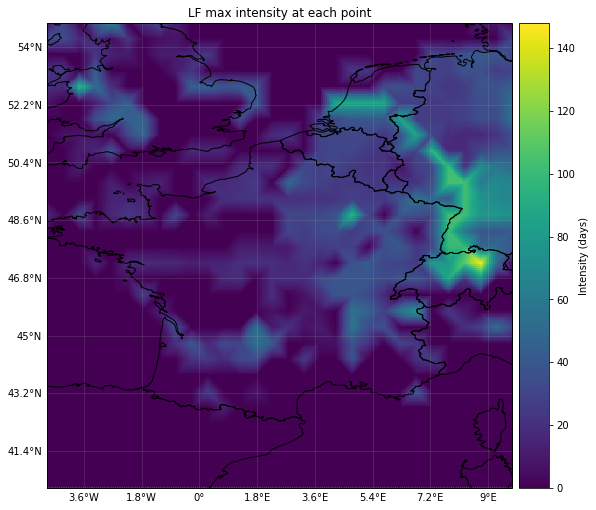

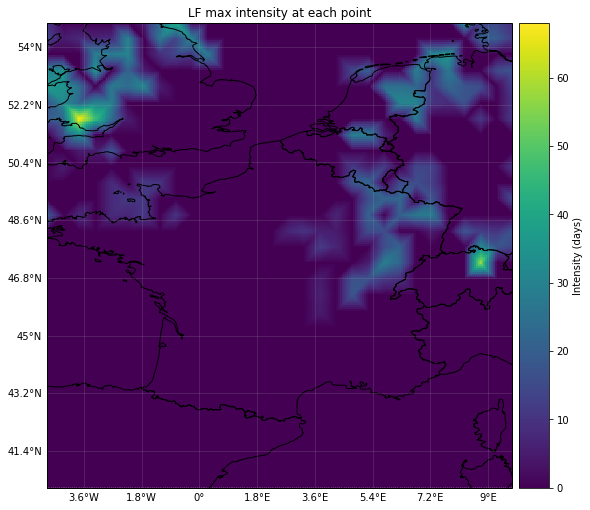

In [335]:
france_2003.plot_intensity(0)
france_2006.plot_intensity(0)

In [336]:
nuclear_france= nuclear[nuclear['country_long']=='France']
nuclear_france = Exposures(nuclear_france)
nuclear_france.check()

2020-06-25 13:31:11,757 - climada.entity.exposures.base - INFO - crs set to default value: {'init': 'epsg:4326', 'no_defs': True}
2020-06-25 13:31:11,758 - climada.entity.exposures.base - INFO - Hazard type not set in if_
2020-06-25 13:31:11,759 - climada.entity.exposures.base - INFO - centr_ not set.
2020-06-25 13:31:11,760 - climada.entity.exposures.base - INFO - deductible not set.
2020-06-25 13:31:11,760 - climada.entity.exposures.base - INFO - cover not set.
2020-06-25 13:31:11,761 - climada.entity.exposures.base - INFO - category_id not set.
2020-06-25 13:31:11,761 - climada.entity.exposures.base - INFO - region_id not set.


In [517]:
IFS_lf = init_IFS_linear(if_slopes['h08']['thermo'])

imp_france_2003 = Impact()
imp_france_2003.calc(nuclear_france, IFS_lf, france_2003)
print(imp_france_2003.at_event.sum()/1000)

imp_france_2006 = Impact()
imp_france_2006.calc(nuclear_france, IFS_lf, france_2006)
print(imp_france_2006.at_event.sum()/1000)

2020-06-25 15:25:03,847 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.
2020-06-25 15:25:03,850 - climada.engine.impact - INFO - Exposures matching centroids found in centr_LF
2020-06-25 15:25:03,856 - climada.engine.impact - INFO - Calculating damage for 19 assets (>0) and 3 events.
7.108140139075726
2020-06-25 15:25:03,863 - climada.engine.impact - INFO - Exposures matching centroids found in centr_LF
2020-06-25 15:25:03,866 - climada.engine.impact - INFO - Calculating damage for 19 assets (>0) and 3 events.
0.7042770096608579


## --> should be 5.5 amd 2.5TWh is 7, 0.7Twh

# Central Europe 2003